# Linear Regression

1. Closed Form Equation Generation (Manual)

In [1]:
# The closed form equation for minimized parameters is given by W = (X.transpose * X).inverse * (X.transpose) * (y)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

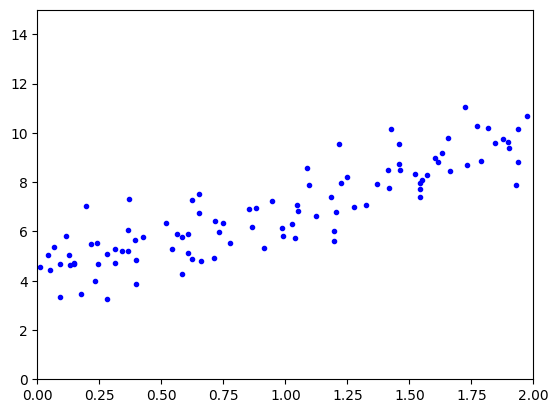

In [36]:
np.random.seed(42)
X_linear_data = 2 * np.random.rand(100, 1)
y_linear = 3 * X_linear_data + 4 + np.random.randn(100, 1)

plt.axis([0,2,0,15])
plt.plot(X_linear_data, y_linear, 'b.')
plt.show()

In [37]:
X_b = np.c_[np.ones((100,1)), X_linear_data]

theta_best = np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [38]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

y_predict = X_new_b.dot(theta_best)
print("Predicted values:\n", np.c_[X_new, y_predict])

Predicted values:
 [[0.         1.03315352]
 [2.         6.09487734]]


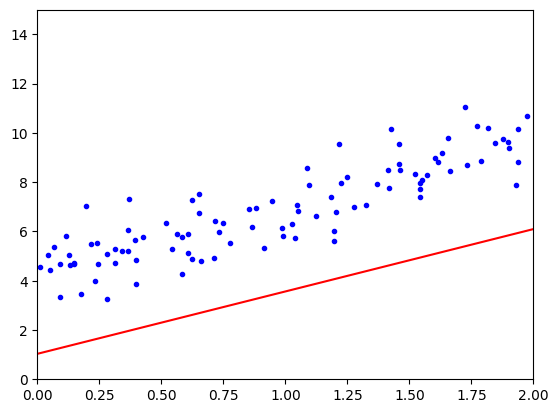

In [39]:
# Quite insane how easy it is to plot values once you learn shorthands
plt.plot(X_new, y_predict, "r-")
plt.plot(X_linear_data, y_linear, "b.")
plt.axis([0,2, 0, 15])
plt.show()

2. Using sklearn directly

Weights: [[0.         2.53086191]] and Bias: [1.03315352]


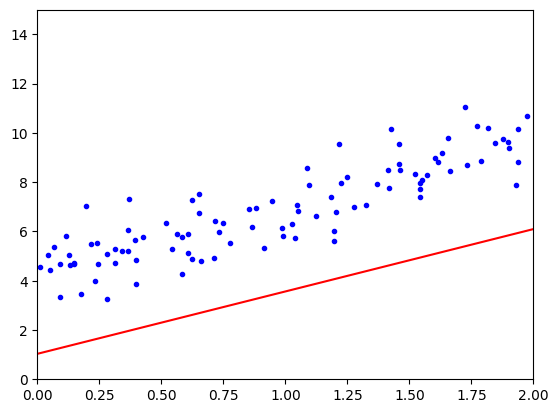

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_b, y)
print("Weights:", lin_reg.coef_, "and Bias:", lin_reg.intercept_)

plt.plot(X_new, lin_reg.predict(X_new_b), 'r-')
plt.plot(X_linear_data, y_linear, 'b.')
plt.axis([0,2,0,15])
plt.show()

Better to use these three than compute the normal equation method, because of the edge case when (X.T * X) is singular/invertible.

In [41]:
# NOTE: The LinearRegression is based on scipy.linalg.lstsq()
# Using the function itself
import scipy as sp

In [42]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

# OR

theta_best_pinv = np.linalg.pinv(X_b).dot(y)

print(theta_best, theta_best_pinv, theta_best_svd, sep='\n\n')

[[1.03315352]
 [2.53086191]]

[[1.03315352]
 [2.53086191]]

[[1.03315352]
 [2.53086191]]


All the above methods are heavily affected by the number of features. (n^2.8 to n^3)

Also the number of instances in data has to be small enough to fit into the memory.

### Gradient Descent

1. Batch Gradient Descent

Theta after gradient descent:
 [[1.03315352]
 [2.53086191]]


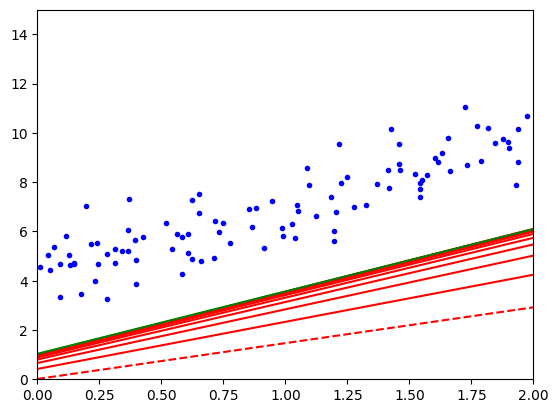

In [43]:
eta = 0.1
n_iterations = 1000
m = len(X_b)

theta_bgd = np.random.randn(2 , 1)

plt.plot(X_new, X_new_b.dot(theta_bgd), "r--")  # Initial guess for the line
plt.plot(X_linear_data, y_linear, "b.")
plt.axis([0,2,0,15])
for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta_bgd) - y)  # Calculating the gradient for the every feature vector.
    theta_bgd = theta_bgd - eta * gradient                  # Updating the theta vector with the gradient descent step.
    if iteration < 10:
        plt.plot(X_new, X_new_b.dot(theta_bgd), "r-")

plt.plot(X_new, X_new_b.dot(theta_best), "g-")  # Plotting the closed form solution
print("Theta after gradient descent:\n", theta_bgd)

2. Stochastic Gradient Descent

Theta after SGD:
 [[4.18475289]
 [2.73036719]]


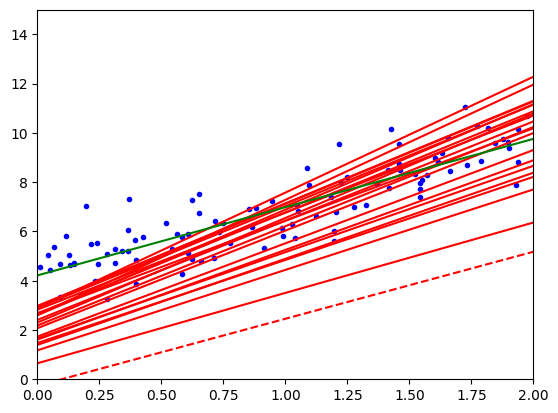

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # Learning schedule parameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(2, 1)

plt.plot(X_new, X_new_b.dot(theta_sgd), "r--")  # Initial guess for the line
plt.plot(X_linear_data, y, "b.")
plt.axis([0,2,0,15])
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y_linear[random_index:random_index+1]
        gradient = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)  # Gradient for the single sample
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradient
        if (epoch < 1) and (i < 20):
            plt.plot(X_new, X_new_b.dot(theta_sgd), "r-")
plt.plot(X_new, X_new_b.dot(theta_best), "g-")  # Plotting the closed form solution
print("Theta after SGD:\n", theta_sgd)

SGD Using sklearn

SGD Weights: [2.8170539] and Bias: [4.23878371]


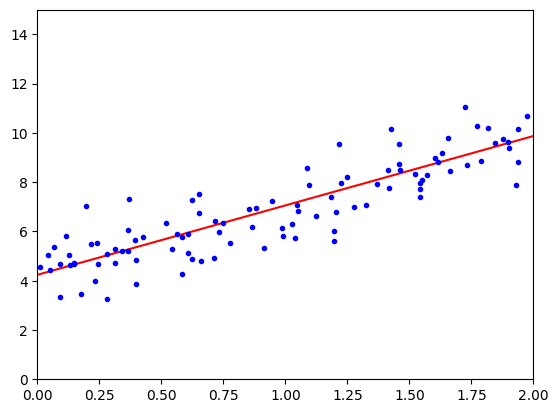

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_linear_data, y_linear.ravel())
print("SGD Weights:", sgd_reg.coef_, "and Bias:", sgd_reg.intercept_)

plt.axis([0,2,0,15])
plt.plot(X_new, sgd_reg.predict(X_new), "r-")
plt.plot(X_linear_data, y_linear, "b.")

In [15]:
# Mini-batch gradient descent is just a combination of the two methods above.

# Polynomial Regression

In [25]:
m = 100
np.random.seed(42)
X_quad_data = 6 * np.random.rand(m, 1) - 3
y_quad = 0.5 * X_quad_data**2 + X_quad_data + 2 + np.random.randn(m, 1)

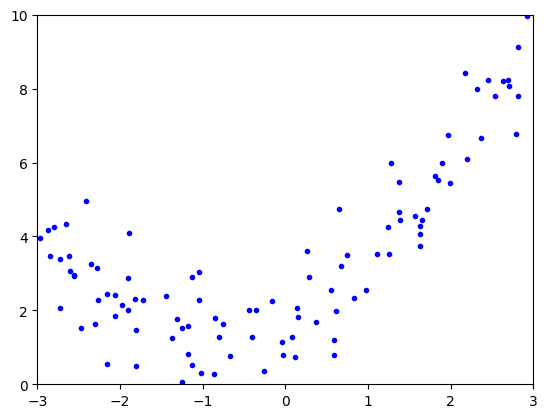

In [26]:
plt.axis([-3, 3, 0, 10])
plt.plot(X_quad_data, y_quad, "b.")

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_quad_data)
print("X without polynomial features:\n", X_quad_data[0:1])
print("Polynomial features:\n", X_poly[0:1])

X without polynomial features:
 [[-0.75275929]]
Polynomial features:
 [[-0.75275929  0.56664654]]


In [28]:
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(X_poly, y_quad)
print("Polynomial Weights:", poly_lin_reg.coef_, "and Bias:", poly_lin_reg.intercept_)

Polynomial Weights: [[0.93366893 0.56456263]] and Bias: [1.78134581]


(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

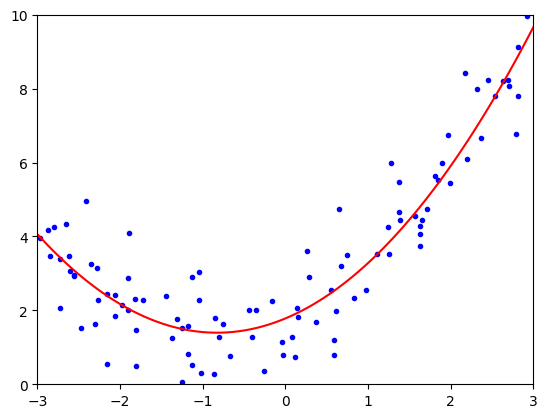

In [29]:
X_new_poly = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly_b = poly_features.fit_transform(X_new_poly)
y_predicted_poly = poly_lin_reg.predict(X_new_poly_b)
plt.plot(X_quad_data, y_quad, "b.")
plt.plot(X_new_poly, y_predicted_poly, "r-")
plt.axis([-3, 3, 0, 10])

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.axis([0, m, 0, 3])
    plt.plot(np.sqrt(train_errors), "r-*", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()


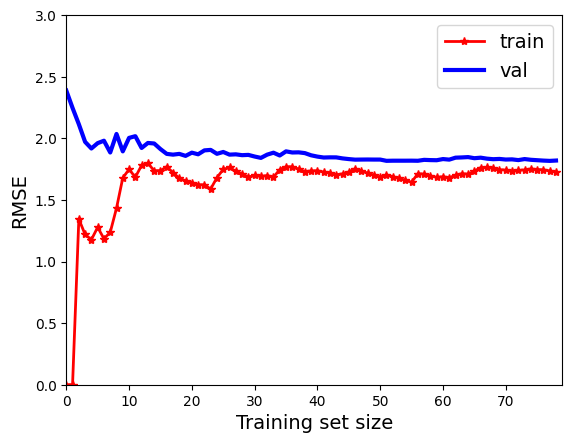

In [57]:
lin_reg_lc = LinearRegression()
plot_learning_curves(lin_reg_lc, X_quad_data, y_quad)

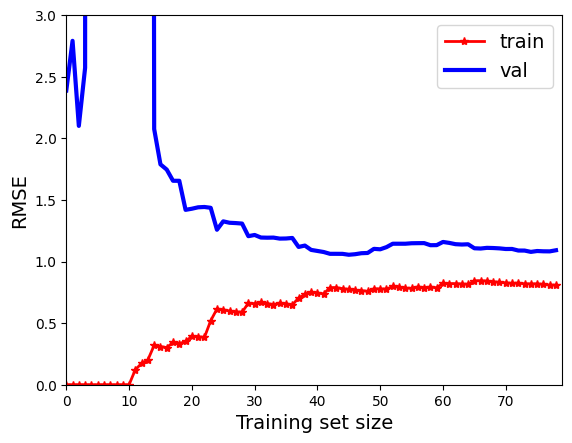

In [58]:
poly_features_10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features_10.fit_transform(X_quad_data)

lin_reg_10_lc = LinearRegression()
plot_learning_curves(lin_reg_10_lc, X_poly_10, y_quad)

# Regularzation Parameters

In [ ]:
'''
    -------------------------------------------------------------------------------
    Regularization is a technique to prevent overfitting.
    -------------------------------------------------------------------------------
    Regularization is highly sensitive to the scale of the features.
    -------------------------------------------------------------------------------
    Make sure to use StandardScaler to normalize the features before applying regularization.
    -------------------------------------------------------------------------------
    Alpha is a hyperparameter that controls the strength of the regularization.
    -------------------------------------------------------------------------------
    Solver is a hyperparameter that controls the algorithm used to solve the optimization problem. cholesky | lbfgs | newton-cg | sag | saga
    -------------------------------------------------------------------------------

'''

1. Ridge Regression

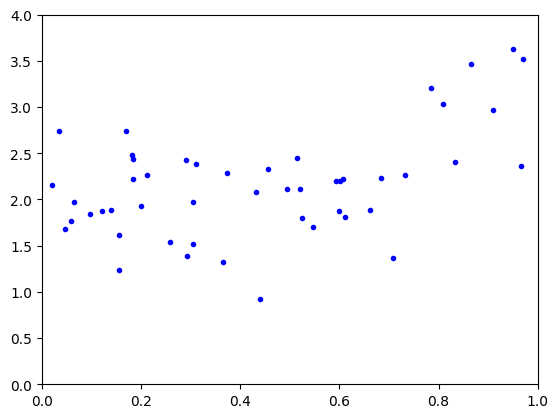

In [122]:
from sklearn.linear_model import Ridge
ridge_reg_1 = Ridge(alpha=1, solver="cholesky")

np.random.seed(42)
X_regularization = np.random.rand(50, 1)
y_regularization = 3 * X_regularization**4 - X_regularization**2 + 2 + np.random.randn(len(X_regularization), 1) / 2

plt.axis([0, 1, 0, 4])
plt.plot(X_regularization, y_regularization, "b.")

Ridge Weights: [0.9653081] and Bias: [1.77355577]


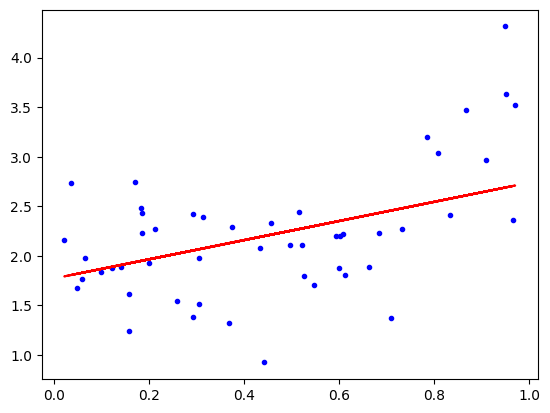

In [132]:
ridge_reg_1.fit(X_regularization, y_regularization)
print("Ridge Weights:", ridge_reg_1.coef_, "and Bias:", ridge_reg_1.intercept_)

y_predicted_ridge = ridge_reg_1.predict(X_regularization)
plt.plot(X_regularization, y_regularization, "b.")
plt.plot(X_regularization, y_predicted_ridge, "r-")

In [133]:
ridge_reg_0 = Ridge(alpha=0, solver="cholesky")
ridge_reg_100 = Ridge(alpha=100, solver="cholesky")

In [169]:
def plot_model(X, y, models, plot_bg=False, bins=100, x_min=0, x_max=1, y_min=0, y_max=10, style='r-', poly_features=None):
    X_temp = np.linspace(x_min, x_max, bins).reshape(bins, 1)
    X_poly = X_temp.copy()
    if (poly_features != None):
        X_poly = poly_features.transform(X_temp)
        
    for model in models:
        plt.plot(X_temp, model.predict(X_poly), style, linewidth=2)
    
    if (plot_bg):
        plt.plot(X, y, "b.", linewidth=2)
        plt.axis([x_min, x_max, y_min, y_max])

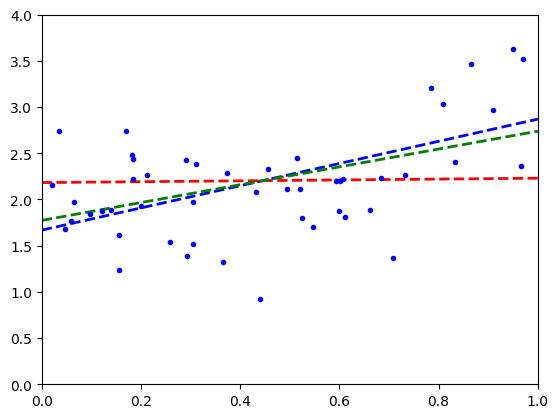

In [ ]:
ridge_reg_0.fit(X_regularization, y_regularization)
ridge_reg_100.fit(X_regularization, y_regularization)

plot_model(X_regularization, y_regularization, [ridge_reg_0], style='b--')
plot_model(X_regularization, y_regularization, [ridge_reg_100], style='r--')
plot_model(X_regularization, y_regularization, [ridge_reg_1], plot_bg=True, y_max=4, style='g--')
plt.show()

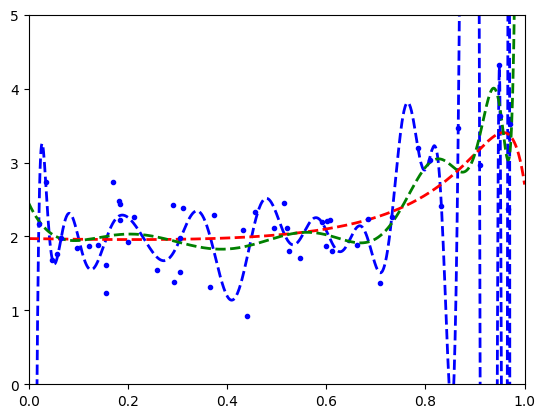

In [150]:
poly_features_50 = PolynomialFeatures(degree=50, include_bias=False)

X_regularization_poly = poly_features_50.fit_transform(X_regularization)

ridge_reg_1e8 = Ridge(alpha=1e-07, solver="cholesky")

ridge_reg_1e8.fit(X_regularization_poly, y_regularization)
ridge_reg_0.fit(X_regularization_poly, y_regularization)
ridge_reg_1.fit(X_regularization_poly, y_regularization)

plot_model(X_regularization, y_regularization, [ridge_reg_0], style='b--', poly_features=poly_features_50)
plot_model(X_regularization, y_regularization, [ridge_reg_1], style='r--', poly_features=poly_features_50)
plot_model(X_regularization, y_regularization, [ridge_reg_1e8], plot_bg=True, style='g--', y_max=5, poly_features=poly_features_50)
plt.show()

In [156]:
# Using SGD to implent ridge regression
sgd_reg_regularization = SGDRegressor(penalty='l2', alpha=0.1, max_iter=1000, tol=1e-3)
sgd_reg_regularization.fit(X_regularization, y_regularization.ravel())

SGDRegressor(alpha=0.1)

2.  Lasso Regression

In [151]:
'''
    ----------------------------------------------------------------------------------------------------------------------------------
    While ridge regression minimizes the sum of the squares of the residuals, Lasso minimizes the sum of the absolute values of the residuals.
    ----------------------------------------------------------------------------------------------------------------------------------
    Lasso is better when we want to find important features in the dataset.
    ----------------------------------------------------------------------------------------------------------------------------------
'''

'\n    ----------------------------------------------------------------------------------------------------------------------------------\n    While ridge regression minimizes the sum of the squares of the residuals, Lasso minimizes the sum of the absolute values of the residuals.\n    ----------------------------------------------------------------------------------------------------------------------------------\n    Lasso is better when we want to find important features in the dataset.\n    ----------------------------------------------------------------------------------------------------------------------------------\n'

Lasso Weights: [0.] and Bias: [2.20400972]


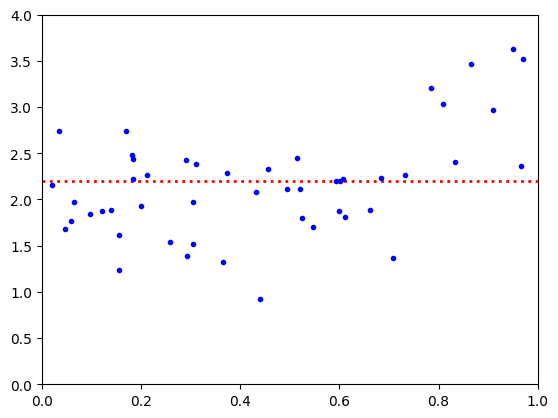

In [186]:
from sklearn.linear_model import Lasso

lasso_reg_1 = Lasso(alpha=1)
lasso_reg_1.fit(X_regularization, y_regularization)
print("Lasso Weights:", lasso_reg_1.coef_, "and Bias:", lasso_reg_1.intercept_)
plot_model(X_regularization, y_regularization, [lasso_reg_1], style='r:', plot_bg=True, y_max=4)

In [187]:
lasso_reg_0 = Lasso(alpha=0, max_iter=10000)
lasso_reg_1e5 = Lasso(alpha=1e-05)
lasso_reg_1e1 = Lasso(alpha=0.1)

lasso_reg_1e1.fit(X_regularization, y_regularization)
lasso_reg_0.fit(X_regularization, y_regularization)

c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.459e+00, tolerance: 2.082e-03 Linear regression models with null weight for the l1 regularization term 

Lasso(alpha=0, max_iter=10000)

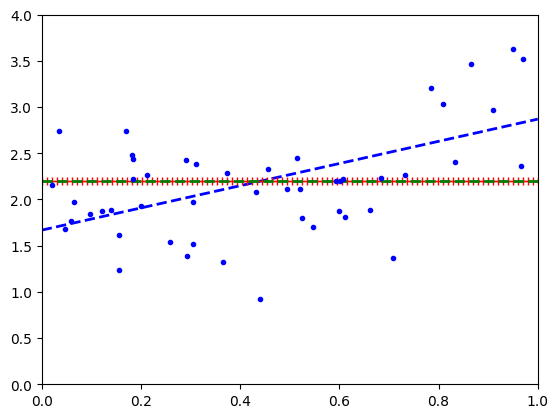

In [188]:
plot_model(X_regularization, y_regularization, [lasso_reg_0], style='b--')
plot_model(X_regularization, y_regularization, [lasso_reg_1e1], style='r+', bins = 100)
plot_model(X_regularization, y_regularization, [lasso_reg_1], plot_bg=True, y_max=4, style='g--')
plt.show()

c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.983e+00, tolerance: 2.082e-03
  model = cd_fast.enet_coordinate_descent(
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Vansh\PROJECTS\Learning\Mac

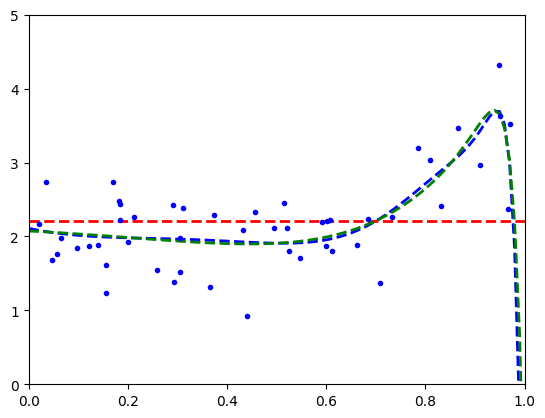

In [189]:
lasso_reg_1.fit(X_regularization_poly, y_regularization)
lasso_reg_1e5.fit(X_regularization_poly, y_regularization)
lasso_reg_0.fit(X_regularization_poly, y_regularization)

plot_model(X_regularization, y_regularization, [lasso_reg_0], style='b--', poly_features=poly_features_50)
plot_model(X_regularization, y_regularization, [lasso_reg_1], style='r--', poly_features=poly_features_50)
plot_model(X_regularization, y_regularization, [lasso_reg_1e5], plot_bg=True, style='g--', y_max=5, poly_features=poly_features_50)
plt.show()